# Notebook: Data generator


This notebook generate the data that will be used for all models.

## Some functions

In [1]:
import numpy as np
import torch as th
import time
from scipy import stats
from KS import KS
import matplotlib.pyplot as plt
from sklearn import preprocessing
from numpy import savetxt
import pandas as pd
import pickle

In [2]:
def generatingdata(state_initial, length,sample_points,dt,final_time):
    """
    This function will generate data from the KS.py simulation
    
    input:
    - state_initial: the initial/current state of the system
    - length: the "physical" length of the domaine. 
              pay attention cuz this value will determine if the system is regular or chaotic
    - sample_points: the number of sample points on this length. It will be the size of the input in our system
    - dt: the time step of the simulation
    - final_time: the total time of simulation
    in this way, the number of iteraction of the simulation will final_time/dt
    
    
    output:
    - return: state_history, time_counter, position_x
    - print: state_history.shape et final_time
    
    state_history: all the spatialtemporal evolution of the system. shape: [number of iteractions,samples_points]
    time_counter: array of the time corresponding to each interaction
    position_x: array of samples_points points that goes from 0 to length
    
    """
    ks = KS(L=length,N=sample_points,dt=dt) #class of the simulation
    total_iteractions = int(np.round(final_time/dt))
    print("Running for : ",final_time, 'seconds', 'with', total_iteractions, 'iteractions')
    time_counter = 0 
    action = np.zeros(1) # in this simulation, we will set actions=0
    state_history = np.matrix(state_initial) # We will stack in state_history at each time step
    
    current_state = state_initial
    for nt in range(total_iteractions): 
        current_state = ks.advance(current_state,action)
        state_history = np.vstack((state_history,current_state))
        time_counter = np.hstack((time_counter,(nt+1)*ks.dt))
        if nt==100:
          print('100th iteraction: ok')
        if nt==1000:
          print('1000th iteraction: ok')
        if nt==2500:
          print('2500th iteraction: ok')
        if nt==5000:
          print('5000th iteraction: ok')
        if nt==10000:
          print('10000th iteraction: ok')
        if nt==50000:
          print('50000th iteraction: ok')
        if nt==75000:
          print('75000th iteraction: ok')
        if nt==100000:
          print('100000th iteraction: ok')
    
    position_x=ks.x
    # Explore the results 
    print('The state_history shape is:', state_history.shape)
    print('The final time:', time_counter[-1])
    
    return state_history, time_counter, position_x

In [8]:
def drawKS(U_sim, x_axis, t_axis ,startT=0,endT=0, width = 8, divwidth = 4): 
    """
    This function will plot the evolution of the KS system (U_sim) over time (t_axis)
    
    """
    fig = plt.figure(figsize=(width, width/divwidth))
    ax = fig.gca()
    ola = ax.contourf(t_axis[startT:endT], x_axis, U_sim[startT:endT,:].T, 15)
    cbar = plt.colorbar(ola)
    plt.xlabel('T')
    plt.ylabel('X')
    plt.show()

In [4]:
def plothist(state_history,bins=30):
    """
    plot the histogram of KS system data with the correct label
    
    """
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.hist(state_history,bins=30)
    plt.xlabel('Values of velocity')
    plt.ylabel('Frequency')
    plt.title('Histogram of state_history')
    plt.grid(True, color="#93a1a1", alpha=0.3)

In [5]:
def statvalues(state_history):
    """
    print some statistics values of the KS data
    
    """
    print('Mean:', np.mean(state_history))
    print('Median:', np.median(state_history))
    print('Max:', np.max(state_history))
    print('Min:', np.min(state_history))
    print('Mode:', stats.mode(state_history))
    print('Variance:', np.var(state_history))


In [6]:
def evolutionstat(state_history):
  """
  plot the temporal evolution of some statistics values
  
  """  
  plt.subplots(figsize=(15, 7))
  plt.subplot(2,3,1)
  plt.plot(np.mean(state_history,axis=1))
  plt.title('Mean')
  plt.ylabel('Mean value')
  plt.subplot(2,3,2)
  plt.plot(np.median(state_history,axis=1))
  plt.title('Median')
  plt.ylabel('Median value')
  plt.subplot(2,3,3)
  plt.plot(np.max(state_history,axis=1))
  plt.title('Max')
  plt.ylabel('Max value')
  plt.xlabel('Time evolution')
  plt.subplot(2,3,4)
  plt.plot(np.min(state_history,axis=1))
  plt.title('Min')
  plt.ylabel('Min value')
  plt.xlabel('Time evolution')
  plt.subplot(2,3,5)
  plt.plot(np.var(state_history,axis=1))
  plt.title('Variance')
  plt.ylabel('Variance value')
  plt.xlabel('Time evolution')

## Data generation

Set the main paramaters of the simulation

In [7]:
final_time = 1000 # the total time of the simulation
dt = 0.25 # the time step 
length = 22 # the "physical" length of the domaine. pay attention cuz this value will determine if the system is regular or chaotic
sample_points = 64 # the number of sample points on this length. It will be the size of the input in our system

Generating and saving the data:

Running for :  10750 seconds with 215000 iteractions
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
10000th iteraction: ok
50000th iteraction: ok
75000th iteraction: ok
100000th iteraction: ok
The state_history shape is: (215001, 64)
The final time: 10750.0
Running for :  10750 seconds with 215000 iteractions
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
10000th iteraction: ok
50000th iteraction: ok
75000th iteraction: ok
100000th iteraction: ok
The state_history shape is: (215001, 64)
The final time: 10750.0
Running for :  10750 seconds with 215000 iteractions
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
10000th iteraction: ok
50000th iteraction: ok
75000th iteraction: ok
100000th iteraction: ok
The state_history shape is: (215001, 64)
The final time: 10750.0
Running for :  10750 seconds with 215000 iteractions
100th iteraction: ok
1000th iteraction: ok
2500th ite

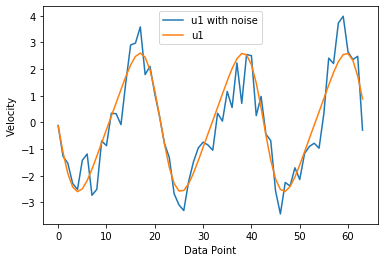

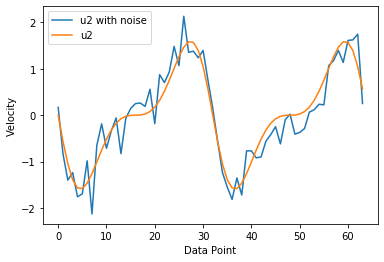

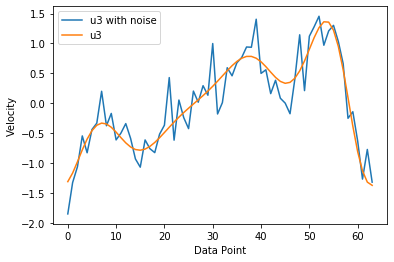

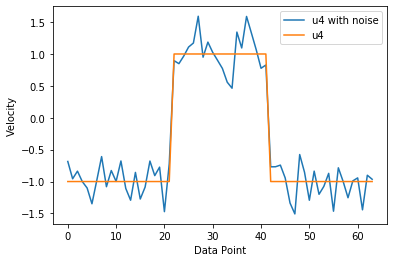

In [10]:
u=['u1','u2','u3','u4'] #initial state
v=[.7,.4,.3,.25] #the noise for each initial state

for i in range(4):
    state_initial = np.loadtxt(u[i]+'.dat')
    noise = np.random.normal(0, v[i], state_initial.shape)
    state_initial_noise = state_initial + noise
    plt.figure()
    plt.plot(state_initial_noise, label=u[i]+' with noise')
    plt.plot(state_initial, label=u[i])
    plt.xlabel('Data Point')
    plt.ylabel('Velocity')
    plt.legend()
    #to generate data

    state_history, time_counter, position_x = generatingdata(state_initial_noise, length,sample_points,dt,final_time)

    #to save the generated data
    # save to csv file
    savetxt('state_history_3_'+u[i]+'.dat', state_history[15000:])
    savetxt('time_counter_3_'+u[i]+'.dat', time_counter[:200001])
    savetxt('position_3_'+u[i]+'.dat', position_x)

If we wanna to load the data and make some changes:

In [28]:
cd ..

C:\Users\Callado\Documents\GitHub\Research-internship\Simulators


In [29]:
cd ../Simulators/ks-simulator/dataset

C:\Users\Callado\Documents\GitHub\Research-internship\Simulators\ks-simulator\dataset


In [33]:
#to load data
from numpy import load

number_of_sets = 50

state_history = np.zeros((8001*number_of_sets,64))
time_counter = np.linspace(0,2000*number_of_sets,8001*number_of_sets)
position_x = np.loadtxt('position_5_0.dat')

for i in range(number_of_sets):
  state_history[8001*(i):8001*(i+1),:] = np.loadtxt('state_history_5_'+str(i)+'.dat')

print('The state_history shape is:', state_history.shape)
print('The final time:', time_counter[-1])
print('Total length', position_x[1]+position_x[-1])

The state_history shape is: (400050, 64)
The final time: 100000.0
Total length 22.0


In [34]:
np.savetxt('state_history_5_trainingtotal.dat', state_history)

If we wanna load the generated data and add some noise:

In [14]:
u=['u1','u2','u3','u4'] #initial state
v=[.3,.1,.1,.05] #the noise for each initial state

for i in range(4):
    # load numpy array
    state_history = np.loadtxt('state_history_'+u[i]+'.dat')
    time_counter = np.loadtxt('time_counter_'+u[i]+'.dat')
    position_x = np.loadtxt('position_'+u[i]+'.dat')

    noise = np.random.normal(0, v[i], state_history.shape)
    state_history_n = state_history + noise

    #to save the generated data
    # save to csv file
    savetxt('state_history_4_'+u[i]+'.dat', state_history_n)
    savetxt('time_counter_4_'+u[i]+'.dat', time_counter)
    savetxt('position_4_'+u[i]+'.dat', position_x)

Generating a random initial condition with range -0.01 et 0.01 of normal distribution (ref. 15) with dt=0.25 and final_time=2500

In [21]:
cd ../Simulators/ks-simulator/dataset/

C:\Users\Callado\Documents\GitHub\Research-internship\Simulators\ks-simulator\dataset


In [8]:
final_time = 2500 # the total time of the simulation
dt = 0.25
length = 22
sample_points = 64
for i in range(1):
    noise = np.random.normal(0, 0.01, sample_points)
    state_history, time_counter, position_x = generatingdata(noise, length,sample_points,dt,final_time)
    #to save the generated data
    # save to csv file
    #savetxt('state_history_5_'+str(i)+'.dat', state_history[2000:])
    #savetxt('time_counter_5_'+str(i)+'.dat', time_counter[2000:])
    #savetxt('position_5_'+str(i)+'.dat', position_x)

Running for :  2500 seconds with 10000 iteractions
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
The state_history shape is: (10001, 64)
The final time: 2500.0


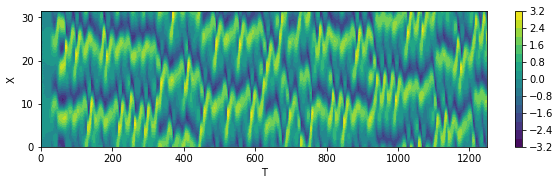

In [18]:
final_time = 10000 # the total time of the simulation
dt = 0.25 # the time step 
length = 22 # the "physical" length of the domaine. pay attention cuz this value will determine if the system is regular or chaotic
sample_points = 64 # the number of sample points on this length. It will be the size of the input in our system
#noise = np.random.normal(0, 0.01, sample_points)
#state_history, time_counter, position_x = generatingdata(noise, length,sample_points,dt,final_time)
#visualizing the solution of KS equation
drawKS(state_history, position_x, time_counter,0,5000,10,4)

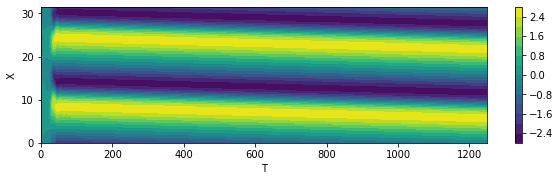

In [19]:
final_time = 10000 # the total time of the simulation
dt = 0.25 # the time step 
length = 16 # the "physical" length of the domaine. pay attention cuz this value will determine if the system is regular or chaotic
sample_points = 64 # the number of sample points on this length. It will be the size of the input in our system
#noise = np.random.normal(0, 0.01, sample_points)
#state_history1, time_counter, position_x = generatingdata(noise, length,sample_points,dt,final_time)
#visualizing the solution of KS equation
drawKS(state_history1, position_x, time_counter,0,5000,10,4)

Running for :  10000 seconds with 40000 iteractions
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
10000th iteraction: ok
The state_history shape is: (40001, 128)
The final time: 10000.0


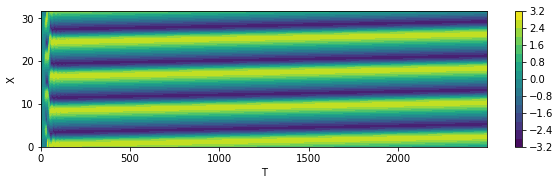

In [22]:
final_time = 10000 # the total time of the simulation
dt = 0.25 # the time step 
length = 32 # the "physical" length of the domaine. pay attention cuz this value will determine if the system is regular or chaotic
sample_points = 128 # the number of sample points on this length. It will be the size of the input in our system
noise = np.random.normal(0, 0.01, sample_points)
state_history2, time_counter, position_x = generatingdata(noise, length,sample_points,dt,final_time)
#visualizing the solution of KS equation
drawKS(state_history2, position_x, time_counter,0,10000,10,4)

## Exploring the data
Let's take a look at the generated data:

In [11]:
state_history[.shape

(10001, 64)

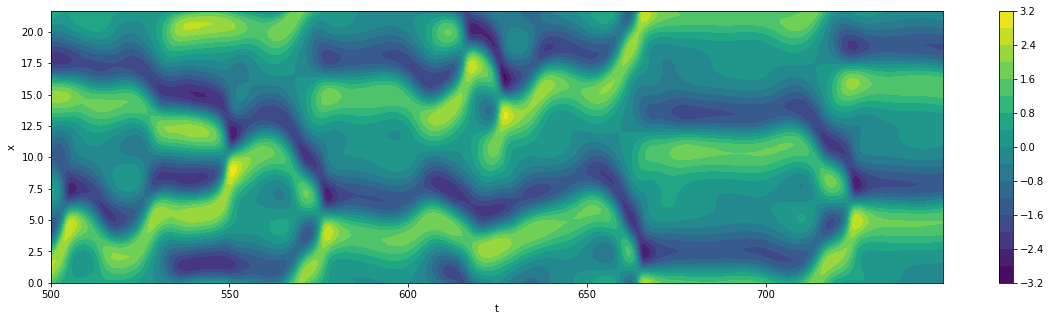

In [20]:
state_history = np.squeeze(np.asarray(state_history))

#visualizing the solution of KS equation
drawKS(state_history, position_x, time_counter,2000,3000,20,4)


#histogram
#plothist(state_history,bins=30)

#statistic values
#statvalues(state_history[:,:])

#evolution of statistic values
#evolutionstat(state_history)

## Trying to use the RNN-Lyapunov-Spectrum code

In [3]:
cd ..

C:\Users\Callado\Documents\GitHub


In [4]:
cd ../GitHub/RNN-Lyapunov-Spectrum/Data/Lorenz3D/Data/

C:\Users\Callado\Documents\GitHub\RNN-Lyapunov-Spectrum\Data\Lorenz3D\Data


In [14]:
ls

 Volume in drive C is OS
 Volume Serial Number is 74AD-86DA

 Directory of C:\Users\Callado\Documents\GitHub\RNN-Lyapunov-Spectrum\Data\Lorenz3D\Data

03/08/2020  11:56    <DIR>          .
03/08/2020  11:56    <DIR>          ..
01/07/2020  16:31         5.280.480 testing_data_N100000.pickle
01/07/2020  16:31         2.880.306 testing_data_N100000_G0-from-1_GS3_GIL0.pickle
01/07/2020  16:31         4.480.306 testing_data_N100000_G0-from-1_GS3_GIL1.pickle
01/07/2020  16:31         2.080.306 testing_data_N100000_G0-from-3_GS0_GIL1.pickle
01/07/2020  16:31         2.880.306 testing_data_N100000_G0-from-3_GS1_GIL1.pickle
01/07/2020  16:31         2.880.306 testing_data_N100000_G1-from-3_GS1_GIL1.pickle
01/07/2020  16:31         2.880.306 testing_data_N100000_G2-from-3_GS1_GIL1.pickle
01/07/2020  16:31         4.800.382 training_data_N100000.pickle
01/07/2020  16:31         2.400.207 training_data_N100000_G0-from-1_GS3_GIL0.pickle
01/07/2020  16:31         4.000.207 training_data_N100000_G0-

In [7]:
x = pd.read_pickle('testing_data_N100000.pickle')

In [11]:
x

{'test_input_sequence': array([[-6.42551135,  0.97623002, 32.77250107],
        [-5.70830792,  1.22681437, 31.84389825],
        [-5.03957632,  1.39607671, 30.9362284 ],
        ...,
        [-0.73352186, -1.32426433, 11.49509416],
        [-0.79513436, -1.43768154, 11.20302157],
        [-0.86224434, -1.56299384, 10.92048701]]),
 'test_target_sequence': array([[ 71.72034295,  25.05843563, -92.86028129],
        [ 66.87316036,  16.92623319, -90.7669858 ],
        [ 61.7913337 ,  10.37558875, -88.17588663],
        ...,
        [ -6.16125053, -11.34172113, -29.20725883],
        [ -6.71099736, -12.53122967, -28.25345618],
        [ -7.32703981, -13.83706997, -27.28921563]]),
 'attractor_std': array([7.92532829, 9.00462603, 8.60614697]),
 'testing_ic_indexes': array([30814, 63827, 65154, ..., 74564, 62531, 39108], dtype=int64),
 'dt': 0.01,
 'sigma': 10,
 'beta': 2.6666666666666665,
 'rho': 28}

In [22]:
print(x['test_target_sequence'][0,0])
print(x['test_input_sequence'].shape)


71.72034295267018
(100000, 3)


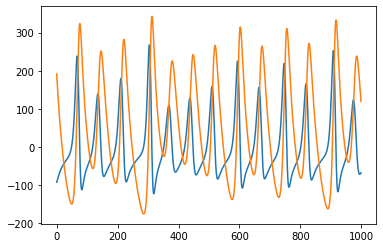

In [37]:
plt.plot(x['test_target_sequence'][:1000,2])
plt.plot(x['test_input_sequence'][:1000,2]*15-300)

Let's see the LE results:

In [60]:
cd ../\RNN-Lyapunov-Spectrum\Results\Lorenz3D\Evaluation_Data\GPU-ARNN-N_used_20000-N_100000-scaler_Standard-NL_1-LR_0.001-L2_0.0-C_gru-RNN_1x40-SL_30

C:\Users\Callado\Documents\GitHub\RNN-Lyapunov-Spectrum\Results\Lorenz3D\Evaluation_Data\GPU-ARNN-N_used_20000-N_100000-scaler_Standard-NL_1-LR_0.001-L2_0.0-C_gru-RNN_1x40-SL_30


In [62]:
ls

 Volume in drive C is OS
 Volume Serial Number is 74AD-86DA

 Directory of C:\Users\Callado\Documents\GitHub\RNN-Lyapunov-Spectrum\Results\Lorenz3D\Evaluation_Data\GPU-ARNN-N_used_20000-N_100000-scaler_Standard-NL_1-LR_0.001-L2_0.0-C_gru-RNN_1x40-SL_30

06/08/2020  14:50    <DIR>          .
06/08/2020  14:50    <DIR>          ..
06/08/2020  14:50           973.679 le_results_N20000.pickle.pickle
06/08/2020  14:32               398 le_results_N20000_ITER1.pickle.pickle
06/08/2020  14:39               913 le_results_N20000_ITER10.pickle.pickle
06/08/2020  14:40               970 le_results_N20000_ITER11.pickle.pickle
06/08/2020  14:41             1.027 le_results_N20000_ITER12.pickle.pickle
06/08/2020  14:42             1.084 le_results_N20000_ITER13.pickle.pickle
06/08/2020  14:43             1.141 le_results_N20000_ITER14.pickle.pickle
06/08/2020  14:44             1.198 le_results_N20000_ITER15.pickle.pickle
06/08/2020  14:45             1.255 le_results_N20000_ITER16.pickle.pickle
06

In [63]:
y = pd.read_pickle('le_results_N20000_ITER21.pickle.pickle')

In [64]:
y

{'TT_every': 100,
 'TRESH': 0.0001,
 'ITER': 21,
 'diff_vec': [98.96905023251178,
  106.72508,
  0.096248716,
  0.08792482,
  0.036011796,
  0.029994313,
  0.013478808,
  0.025664302,
  0.0392791,
  0.009687356,
  0.016457183,
  0.010890136,
  0.007575207,
  0.028028935,
  0.012254165,
  0.021155631,
  0.013927578,
  0.008360725,
  0.0067696054,
  0.010052973,
  0.00836857],
 'exponents_vec': [array([45.019257, 46.942142, 74.59608 ], dtype=float32),
  array([-16.022116  ,  -0.13796818,   0.78783697], dtype=float32),
  array([-15.970293  ,  -0.06436654,   0.8219108 ], dtype=float32),
  array([-15.892252  ,  -0.06896765,   0.86215   ], dtype=float32),
  array([-15.912968  ,  -0.05679531,   0.8889743 ], dtype=float32),
  array([-15.937343  ,  -0.05121395,   0.9055384 ], dtype=float32),
  array([-15.938486  ,  -0.03808462,   0.90271145], dtype=float32),
  array([-15.956343 ,  -0.0398936,   0.9210561], dtype=float32),
  array([-15.930864  ,  -0.02123557,   0.89769846], dtype=float32),
  arr

In [69]:
len(y['exponents_vec'])

21

Now I will try to replace the Lorenz data by KS data:

In [20]:
cd ..

C:\Users\Callado\Documents\GitHub\RNN-Lyapunov-Spectrum\Data


In [21]:
cd ../Data/KuramotoSivashinskyGP512/Data/

C:\Users\Callado\Documents\GitHub\RNN-Lyapunov-Spectrum\Data\KuramotoSivashinskyGP512\Data


In [11]:
ls

 Volume in drive C is OS
 Volume Serial Number is 74AD-86DA

 Directory of C:\Users\Callado\Documents\GitHub\RNN-Lyapunov-Spectrum\Data\KuramotoSivashinskyGP512\Data

06/08/2020  17:29    <DIR>          .
06/08/2020  17:29    <DIR>          ..
06/08/2020  17:27        51.200.924 testing_data_N100000.pickle
01/07/2020  16:31         2.880.306 testing_data_N100000_G0-from-1_GS3_GIL0.pickle
01/07/2020  16:31         4.480.306 testing_data_N100000_G0-from-1_GS3_GIL1.pickle
01/07/2020  16:31         2.080.306 testing_data_N100000_G0-from-3_GS0_GIL1.pickle
01/07/2020  16:31         2.880.306 testing_data_N100000_G0-from-3_GS1_GIL1.pickle
01/07/2020  16:31         2.880.306 testing_data_N100000_G1-from-3_GS1_GIL1.pickle
01/07/2020  16:31         2.880.306 testing_data_N100000_G2-from-3_GS1_GIL1.pickle
06/08/2020  17:28        51.200.924 training_data_N100000.pickle
01/07/2020  16:31         2.400.207 training_data_N100000_G0-from-1_GS3_GIL0.pickle
01/07/2020  16:31         4.000.207 training_

In [14]:
x = pd.read_pickle('testing_data_N100000.pickle')

In [22]:
x

{'test_input_sequence': array([[-6.42551135,  0.97623002, 32.77250107],
        [-5.70830792,  1.22681437, 31.84389825],
        [-5.03957632,  1.39607671, 30.9362284 ],
        ...,
        [-0.73352186, -1.32426433, 11.49509416],
        [-0.79513436, -1.43768154, 11.20302157],
        [-0.86224434, -1.56299384, 10.92048701]]),
 'test_target_sequence': array([[ 71.72034295,  25.05843563, -92.86028129],
        [ 66.87316036,  16.92623319, -90.7669858 ],
        [ 61.7913337 ,  10.37558875, -88.17588663],
        ...,
        [ -6.16125053, -11.34172113, -29.20725883],
        [ -6.71099736, -12.53122967, -28.25345618],
        [ -7.32703981, -13.83706997, -27.28921563]]),
 'attractor_std': array([7.92532829, 9.00462603, 8.60614697]),
 'testing_ic_indexes': array([30814, 63827, 65154, ..., 74564, 62531, 39108], dtype=int64),
 'dt': 0.01,
 'sigma': 10,
 'beta': 2.6666666666666665,
 'rho': 28}

In [23]:
final_time = 25000 # the total time of the simulation
dt = 0.25
length = 22
sample_points = 64
noise = np.random.normal(0, 0.01, sample_points)
state_history, time_counter, position_x = generatingdata(noise, length,sample_points,dt,final_time)
XXX=np.array(state_history)

Running for :  25000 seconds with 100000 iteractions
100th iteraction: ok
1000th iteraction: ok
2500th iteraction: ok
5000th iteraction: ok
10000th iteraction: ok
50000th iteraction: ok
75000th iteraction: ok
The state_history shape is: (100001, 64)
The final time: 25000.0


In [25]:
x['test_input_sequence'].shape

(100000, 3)

In [28]:
XXX[1:].shape

(100000, 64)

In [27]:
x['test_input_sequence']=XXX[1:]
x['test_target_sequence']=XXX[1:]

In [29]:
x

{'test_input_sequence': array([[ 6.38051409e-03, -2.90241094e-03, -3.46599661e-03, ...,
          1.34216078e-02,  1.01391226e-02,  5.24163746e-03],
        [ 3.29823986e-03,  9.11308129e-03,  6.52270776e-03, ...,
          3.64505409e-04,  4.06081537e-03,  7.37291282e-03],
        [ 6.62020541e-03, -2.08758920e-03, -3.54542056e-03, ...,
          1.21560448e-02,  8.34583738e-03,  4.28704287e-03],
        ...,
        [ 1.10621202e+00,  1.52367656e+00,  1.83749107e+00, ...,
         -3.33551226e-01,  1.48054614e-01,  6.35808415e-01],
        [ 1.14387191e+00,  1.55546301e+00,  1.85692414e+00, ...,
         -3.03766884e-01,  1.83487619e-01,  6.74208023e-01],
        [ 1.18202798e+00,  1.58656815e+00,  1.87452253e+00, ...,
         -2.69997205e-01,  2.21716039e-01,  7.14253875e-01]]),
 'test_target_sequence': array([[ 6.38051409e-03, -2.90241094e-03, -3.46599661e-03, ...,
          1.34216078e-02,  1.01391226e-02,  5.24163746e-03],
        [ 3.29823986e-03,  9.11308129e-03,  6.52270776e-

In [30]:
#saving the data:
pickle.dump( x, open( "testing_data_N100000.pickle", "wb" ) )

In [115]:
x = pd.read_pickle('training_data_N100000.pickle')

In [116]:
x

{'train_input_sequence': array([[-1.02290906e-02, -7.02284943e-04,  1.34919012e-02, ...,
         -2.86571846e-02, -5.78621328e-03, -7.18232284e-03],
        [-2.37618374e-03, -8.22833887e-03, -2.11099112e-02, ...,
          6.45724342e-03, -1.48931292e-02, -9.78557809e-03],
        [-1.56679575e-02, -8.61337609e-03,  6.54509237e-03, ...,
         -2.38298578e-02, -3.68849357e-03, -8.96014650e-03],
        ...,
        [ 2.51662444e-01,  7.16125824e-01,  1.17207347e+00, ...,
         -1.07406549e+00, -6.50562751e-01, -2.06320415e-01],
        [ 2.93177504e-01,  7.56053949e-01,  1.20930901e+00, ...,
         -1.03124756e+00, -6.07115625e-01, -1.63613808e-01],
        [ 3.35510524e-01,  7.95699662e-01,  1.24541796e+00, ...,
         -9.82174860e-01, -5.59607222e-01, -1.18661499e-01]]),
 'train_target_sequence': array([[-1.02290906e-02, -7.02284943e-04,  1.34919012e-02, ...,
         -2.86571846e-02, -5.78621328e-03, -7.18232284e-03],
        [-2.37618374e-03, -8.22833887e-03, -2.11099112